<a href="https://colab.research.google.com/github/DanielRajChristeen/Pretrained-MobileNetV2/blob/main/Pretrained_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pretrained MobileNetV2 — Classify Multiple Images**

## **Step 1 — What is MobileNetV2?**

*   MobileNetV2 is a lightweight deep learning model trained on ImageNet (1000 classes).
*  It’s optimized for speed and small size, making it perfect for demos and real-world mobile apps.
*  We’ll use it as pre-trained model to instantly classify multiple images.

## **Step 2 — Import Libraries**

These libraries give us access to the model, image preprocessing utilities, and tools to visualize results.

The libraries,

* tensorflow - Core deep learning framework to load and run the MobileNetV2 model
* image - Tools to load and convert images into model-readable format
* preprocess_input - Normalizes input images for MobileNetV2
* MobileNetV2 - load the pre-trained model
* decode_predictions - interpret the model's output into human-readable labels.
* files - Enables uploading local files directly in Google Colab
* numpy - Handles numerical operations on image data arrays
* matplotlib.pyplot - Displays uploaded images and model predictions visually





In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, MobileNetV2, decode_predictions
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

## **Step 2 — Upload Your Pretrained Model**

Load the MobileNetV2 model pre-trained on ImageNet for instant predictions



In [6]:
model = MobileNetV2(weights='imagenet')
print("✅ Pretrained MobileNetV2 model loaded successfully")

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
✅ Pretrained MobileNetV2 model loaded successfully


## **Step 3 — Image Paths**
 Define the list of images to run through the pretrained model

In [7]:
image_paths = [
    '/content/sample1.jpg',
    '/content/sample2.jpg',
    '/content/sample3.jpg',
    '/content/sample4.jpg'
]

# **Step 4 — Predict and Display**
Loop through each image, run predictions, and display results

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


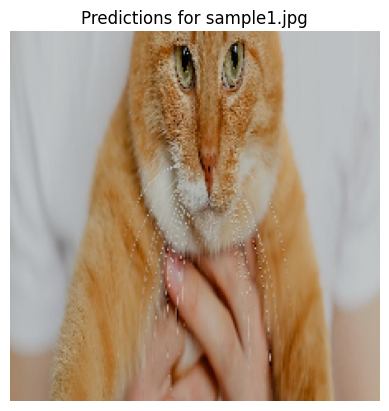

1. Egyptian_cat: 31.98%
2. tiger_cat: 16.55%
3. shower_curtain: 11.63%
-----------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


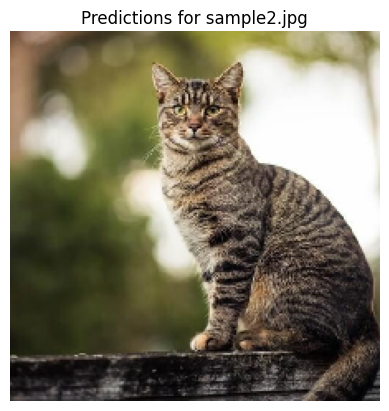

1. tabby: 47.17%
2. tiger_cat: 38.74%
3. Egyptian_cat: 3.89%
-----------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


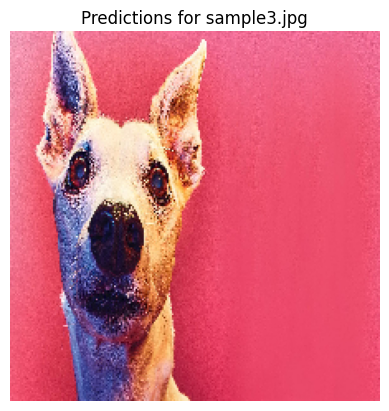

1. mask: 20.88%
2. Doberman: 15.05%
3. miniature_pinscher: 3.26%
-----------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


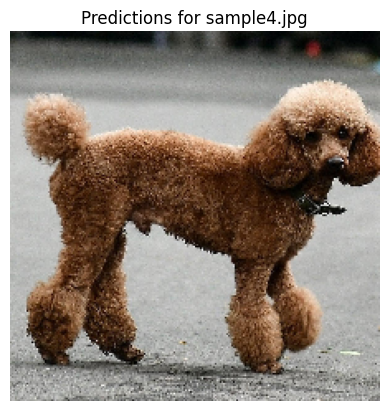

1. standard_poodle: 83.54%
2. miniature_poodle: 10.86%
3. toy_poodle: 2.69%
-----------------------------------------------------


In [8]:
for path in image_paths:
    # Load and preprocess image for model
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)

    # Predict top 3 classes using the model
    predictions = model.predict(img_preprocessed)
    decoded = decode_predictions(predictions, top=3)[0]

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predictions for {path.split('/')[-1]}")
    plt.show()

    # Print predictions with probabilities
    for i, (imagenet_id, label, prob) in enumerate(decoded):
        print(f"{i+1}. {label}: {prob*100:.2f}%")
    print("-----------------------------------------------------")
